# QFT Multiplication

[Quantum arithmetic with the Quantum Fourier Transform](https://arxiv.org/pdf/1411.5949)

[Multiplication on Quantum Computers with Qiskit](https://quantumcomputinguk.org/tutorials/multiplication-on-quantum-computers-with-qiskit)

## Multiplication of two 2-qubit values

* Qubits 0 and 2 hold Operand A which we will use to store 3. 

* Qubits 3 and 5 hold Operand B which we will use to store 5.

* Qubits 6 to 10 hold the output qubits that will hold the result. 

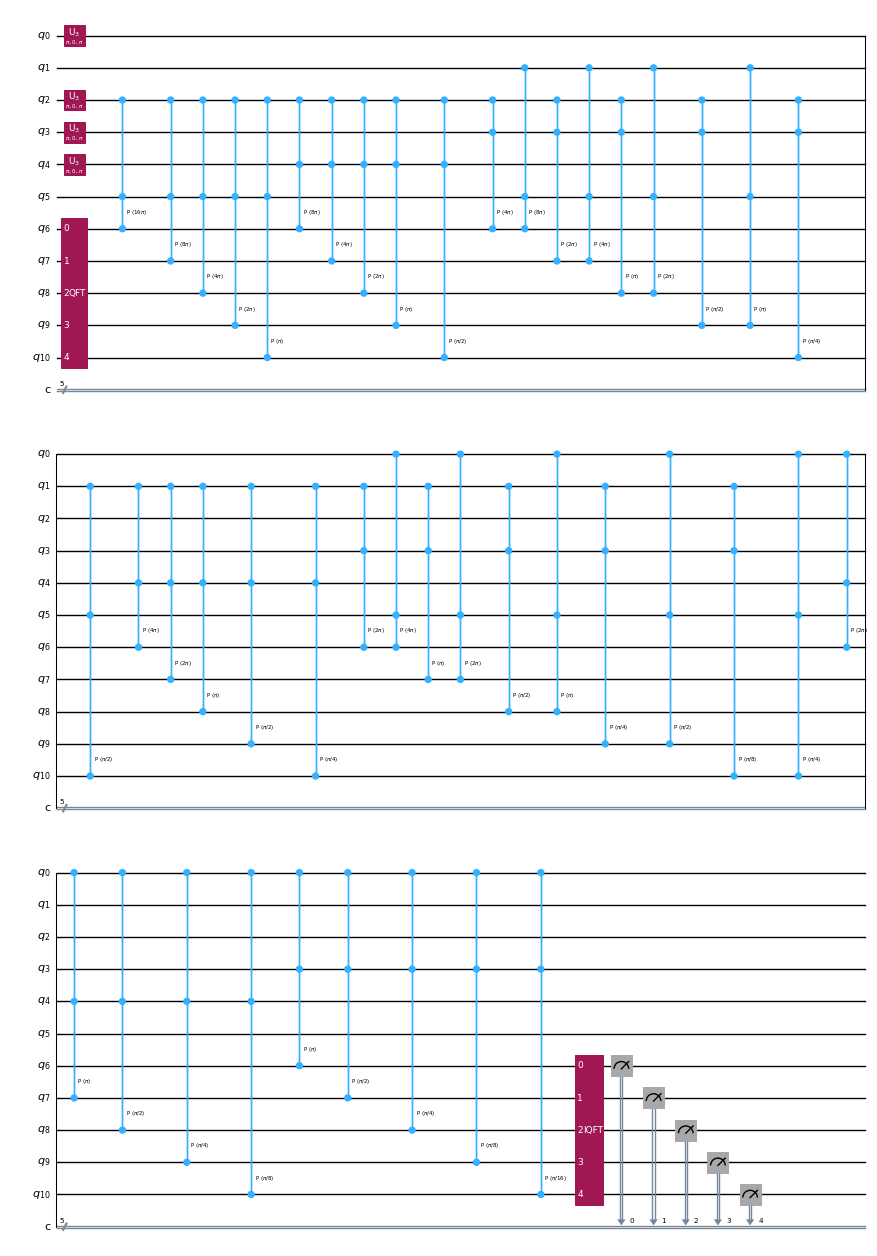

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RGQFTMultiplier

qc = QuantumCircuit(11, 5)
# Encode 5/101 onto qubits 0-2
qc.x(0)
qc.x(2)

# Encode 3/011 onto qubits 3-5
qc.x(3)
qc.x(4)

qc = qc.compose(RGQFTMultiplier(num_state_qubits=3, num_result_qubits=5))

qc.measure(6, 0)
qc.measure(7, 1)
qc.measure(8, 2)
qc.measure(9, 3)
qc.measure(10, 4)

qc.decompose().draw('mpl', scale=0.5, filename='rgqft_multiplier.png')

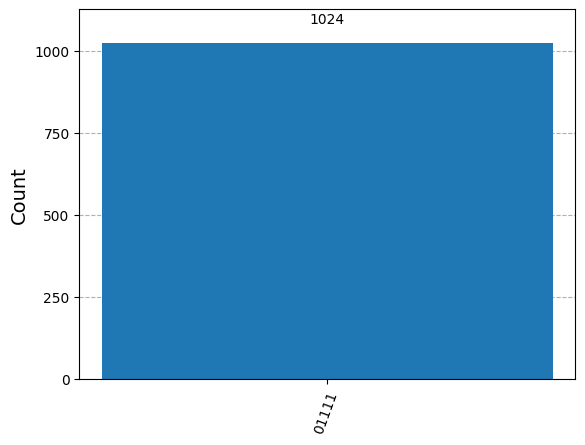

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc)#, shots=2048
counts = job.result().get_counts()
plot_histogram(counts)

If we want to look more closely to the *QFT* circuit, we can have a look at the transpiled circuit

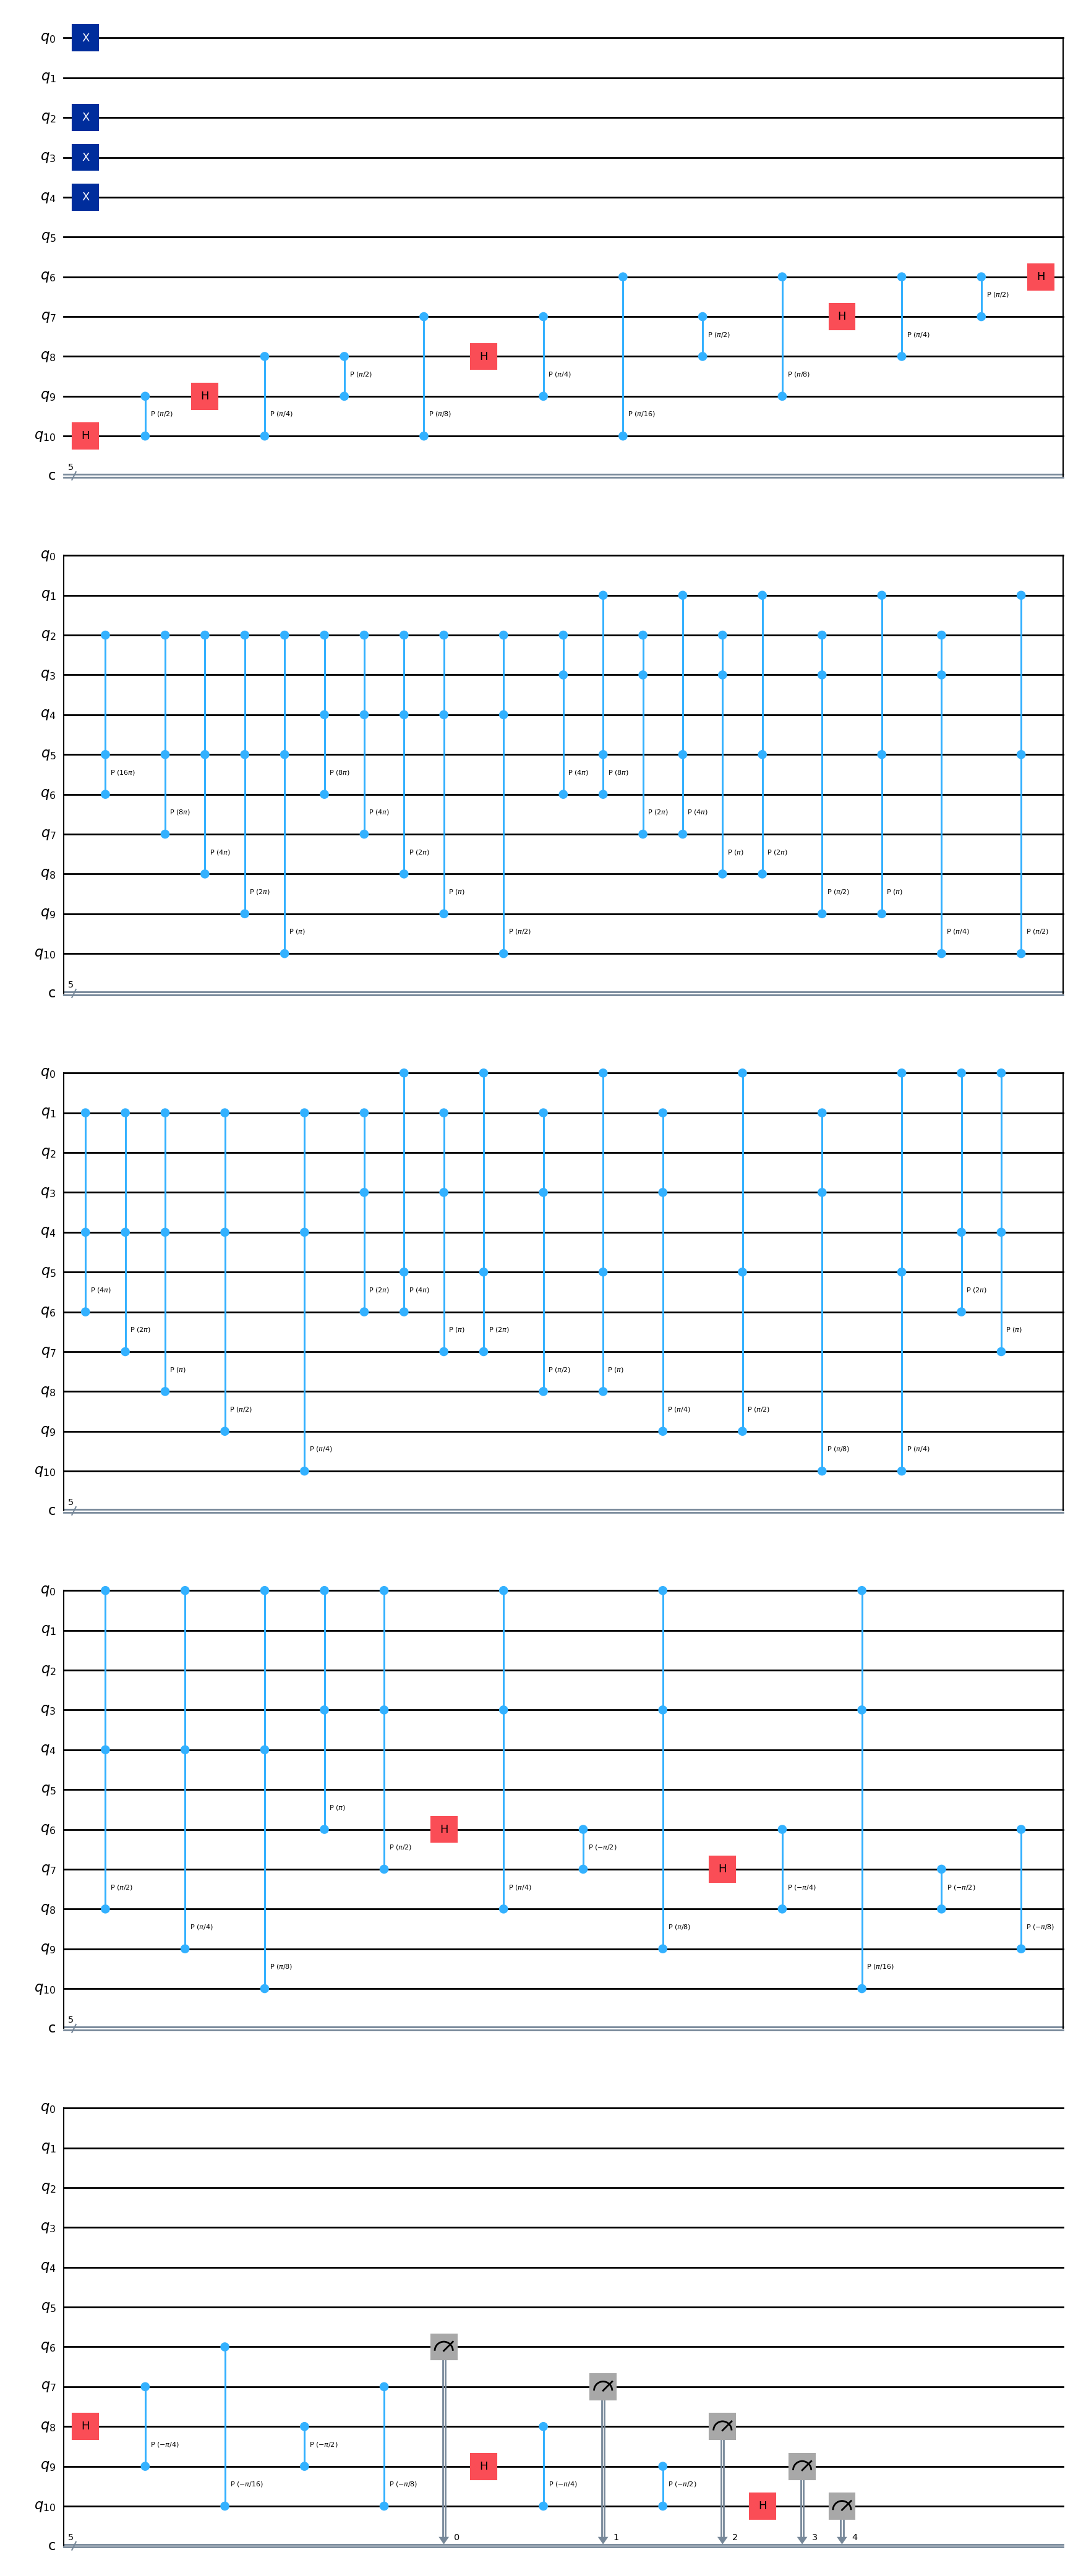

In [3]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend = AerSimulator()
pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")